In [13]:
import json
from pathlib import Path
import os

dataset_path = Path("C:\\data")
train_folder = dataset_path.joinpath(Path("train"))
f0_folder = train_folder.joinpath(Path("0"))
f4_folder = train_folder.joinpath(Path("1"))
test_folder = dataset_path.joinpath(Path("test"))

In [14]:
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split

train_lower = []
train_upper = []
train_rpa = []
train_circle = []
train_target = []
train_id = []
test_lower = []
test_upper = []
test_rpa = []
test_circle = []
test_id = []

f0filenames = os.listdir(f0_folder)
f4filenames = os.listdir(f4_folder)
testfilenames = os.listdir(test_folder)
crop_horizontal = 250
crop_vertical = 10
img_size = (1050, 326)
box = (crop_horizontal, crop_vertical, img_size[0]-crop_horizontal, img_size[1]-crop_vertical)

for f0filename in f0filenames:
    pat = f0_folder.joinpath(f0filename)
    l = Image.open(pat.joinpath("lower.png"))
    u = Image.open(pat.joinpath("upper.png"))
    l = l.crop(box)
    u = u.crop(box)
    rpa = Image.open(pat.joinpath("radial_polar_area.png"))
    c = Image.open(pat.joinpath("circle.png"))
    tar = 0
    train_lower.append(np.asarray(l))
    train_upper.append(np.asarray(u))
    train_rpa.append(np.asarray(rpa))
    train_circle.append(np.asarray(c))
    train_target.append(tar)
    train_id.append(f0filename)
    
for f4filename in f4filenames:
    pat = f4_folder.joinpath(f4filename)
    l = Image.open(pat.joinpath("lower.png"))
    u = Image.open(pat.joinpath("upper.png"))
    l = l.crop(box)
    u = u.crop(box)
    rpa = Image.open(pat.joinpath("radial_polar_area.png"))
    c = Image.open(pat.joinpath("circle.png"))
    tar = 1
    train_lower.append(np.asarray(l))
    train_upper.append(np.asarray(u))
    train_rpa.append(np.asarray(rpa))
    train_circle.append(np.asarray(c))
    train_target.append(tar)
    train_id.append(f0filename)
    
for testfilename in testfilenames:
    pat = test_folder.joinpath(testfilename)
    l = Image.open(pat.joinpath("lower.png"))
    l = l.crop(box)
    rpa = Image.open(pat.joinpath("radial_polar_area.png"))
    c = Image.open(pat.joinpath("circle.png"))
    test_lower.append(np.asarray(l))
    test_rpa.append(np.asarray(rpa))
    test_circle.append(np.asarray(c))
    test_id.append(testfilename)

train_id, val_id, train_lower, val_lower, train_upper, val_upper, train_rpa, val_rpa, train_circle, val_circle, train_target, val_target = train_test_split(train_id, train_lower, train_upper, train_rpa, train_circle, train_target, test_size = 0.2)
    
dataset = {
    "train":{
        "id": train_id,
        "lower": train_lower,
        "upper": train_upper,
        "rpa": train_rpa,
        "circle": train_circle,
        "target": train_target
    },
    
    "val":{
        "id": val_id,
        "lower": val_lower,
        "upper": val_upper,
        "rpa": val_rpa,
        "circle": val_circle,
        "target": val_target
    },
    
    "test":{
        "id": test_id,
        "lower": test_lower,
        "rpa": test_rpa,
        "circle": test_circle
    }
}



In [15]:
import pickle
with open("dataset.pkl", mode="wb") as file:
    pickle.dump(dataset, file)


<IPython.core.display.Javascript object>


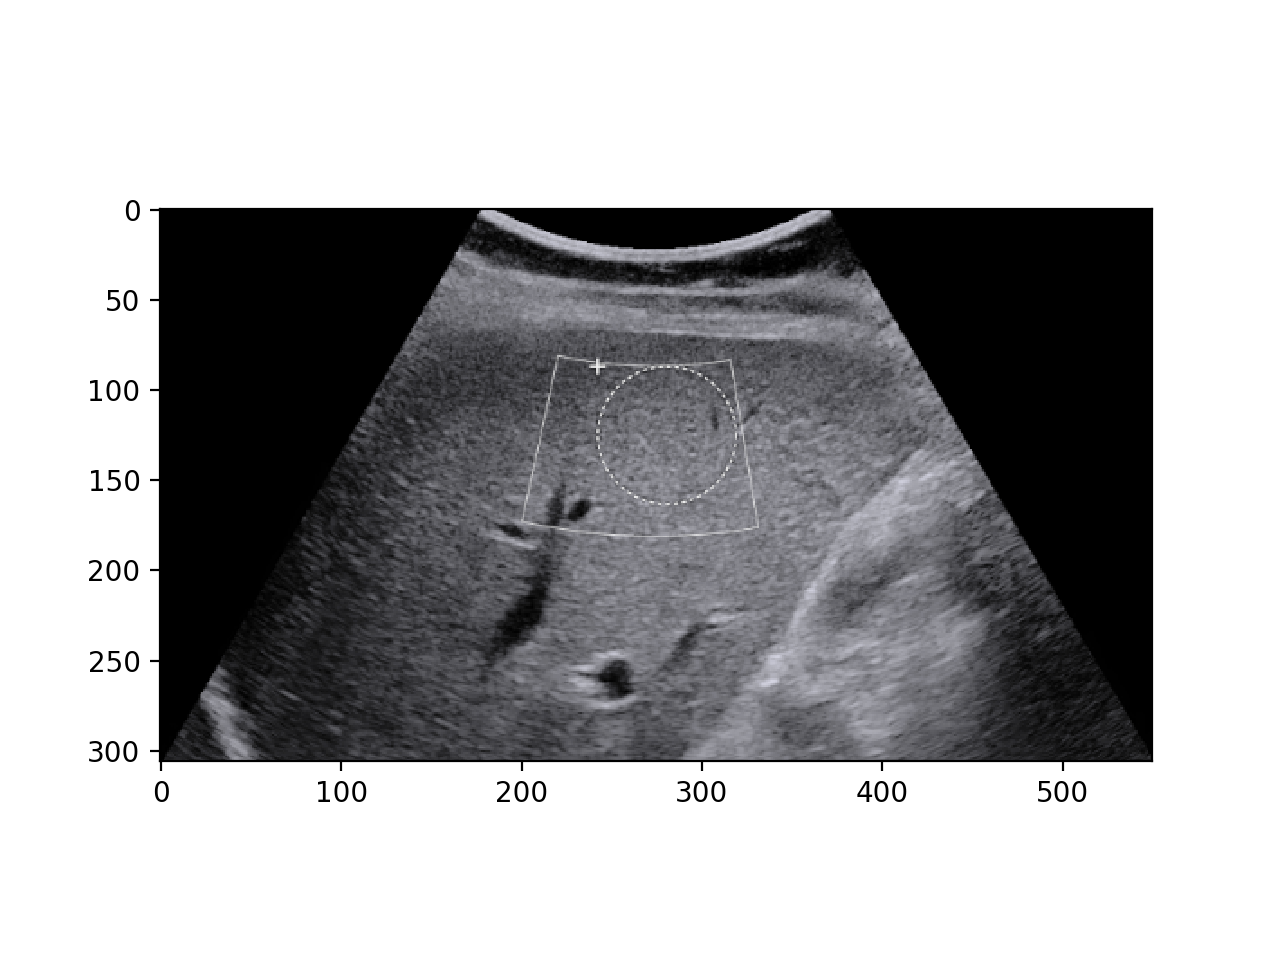

In [16]:
%matplotlib notebook
from PIL import Image
import matplotlib as mpl
import matplotlib.pyplot as plt

img = Image.open(f0_folder.joinpath("2","lower.png"))
crop_horizontal = 250
crop_vertical = 10
img_size = (1050, 326)
img = img.crop((crop_horizontal, crop_vertical, img_size[0]-crop_horizontal, img_size[1]-crop_vertical))
plt.imshow(img)


In [17]:
img.size

(550, 306)